<a href="https://colab.research.google.com/github/RVMsgit/NLP/blob/main/cloudedit_CBDC_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import openpyxl as xl
import pandas as pd
import html as ht
import requests as rq
from bs4 import BeautifulSoup as bs
import re
from matplotlib import pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import collections as coll 


# 1. Getting Data

In [8]:
#Take urls from csv
df_url_list = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/Speeches_data.csv',delimiter=';')[['Speech_title','Date_m','country_name','URL_text']]

df_CBDC = df_url_list[~df_url_list['URL_text'].str.contains('pdf') & ~df_url_list['URL_text'].str.contains('central')]
#................................................................................................................................

#................................................................................................................................
list_url = list(df_url_list['URL_text'])
Use_url = [i for i in list_url if '.htm' in i]

## 2. Filtering Data and Adding data to DFs

In [ ]:
#we will append the text results to a list of values and later asign a key to each list
#.........................................................................................

all_text = [] #list where all speeches will be appended
nlp_text = [] #nlp filered with stopwords
counter = [] #frequency of words
#extending the stopword list
  #creating date pattern to clean dates
d_pattern = "[0-9]{4}$"
stop_words = stopwords.words('english')
stop_words.extend(['','In','It','To','First','Second','Third','The','Ladies','ladies','gentlemen' 'I', 'Dear', 'friends', 'Hello!','going','here','i.e.',r'[0-9]{4}$'])
#For loop to iterate through the BIS csv URL_text column and get transcription from speech
#.........................................................................................
for i in df_CBDC['URL_text']:
    response = rq.get(i)
    print(i)
    soup = bs(response.text,'html.parser')
    text = soup.find('body').find('div',attrs={'id':'container'}).find('div',attrs={'id':'cmsContent'}).text
    cleaned_text = (re.sub('\n',' ',text.strip()).split(' '))
    optimized_speech = ([i for i in cleaned_text if i not in stop_words]) #we get rid of unnecesarry words to mazimize sentiment analysis
    nlp_text.append(optimized_speech)
    all_text.append(cleaned_text)
    counter.append(coll.Counter(optimized_speech))
#.........................................................................................


**2.1**. Setting full speeches, optimal, and counter to filtered dataframe

In [11]:
#creaing a dataframe with only without speeches that contain crypto
#Creating column with text from speech
df_CBDC['text_str'] = all_text
df_CBDC['text_str'] = df_CBDC['text_str'].str.join(' ')
#creating coolumn with stopwroded text
df_CBDC['nlp_txt'] = nlp_text
df_CBDC['nlp_txt'] = df_CBDC['nlp_txt'].str.join(' ')
#computing most frequent words
df_CBDC['cnt_txt'] = [dict(i) for i in counter]
  #Sorting the highest frequency elements
df_CBDC['cnt_txt'] = df_CBDC['cnt_txt'].apply(lambda x: {k: v for k, v in sorted(x.items(), key=lambda item: item[-1],reverse = True)})
df_CBDC['freq_wrds'] = df_CBDC['cnt_txt'].apply(lambda x: ' '.join(x.keys()))
df_CBDC.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Speech_title,Date_m,country_name,URL_text,text_str,nlp_txt,cnt_txt,freq_wrds
1,Yves Mersch: Distributed ledger technology - p...,01/04/2016,Euro Area,https://www.bis.org/review/r160426b.htm,Is distributed ledger technology (DLT) a hype ...,Is distributed ledger technology (DLT) hype ne...,"{'market': 25, 'central': 25, 'DLT': 21, 'bank...",market central DLT bank financial would could ...
2,Erkki Liikanen: Cash and the central bank,01/06/2016,Finland,https://www.bis.org/review/r160616e.htm,"Dear friends and colleagues, I want to welcome...","colleagues, I want welcome conference organize...","{'cash': 20, 'would': 17, 'interest': 15, 'low...",cash would interest lower This central rates b...
3,Mark Carney: Enabling the FinTech transformati...,01/06/2016,United Kingdom,https://www.bis.org/review/r160621e.htm,Given the tragic murder of Jo Cox MP on 16 Jun...,"Given tragic murder Jo Cox MP 16 June, Mansion...","{'Bank': 33, 'FinTech': 33, 'could': 33, 'fina...",Bank FinTech could financial - central settlem...
4,Carolyn Wilkins: Fintech and the financial eco...,01/06/2016,Canada,https://www.bis.org/review/r160622a.htm,"I would like to thank Scott Hendry, Grahame Jo...","I would like thank Scott Hendry, Grahame Johns...","{'financial': 50, 'could': 27, 'new': 25, 'als...",financial could new also This I Bank technolog...
6,Ravi Menon: Singapore's FinTech journey - wher...,01/11/2016,Singapore,https://www.bis.org/review/r161118a.htm,"Ladies and gentlemen, good morning and welcome...","gentlemen, good morning welcome inaugural Sing...","{'financial': 27, 'MAS': 25, 'FinTech': 24, '-...",financial MAS FinTech - data We industry innov...


2.2. Computing the Sentiment for speeches on CBDC and crypto

In [19]:
from textblob import TextBlob #importing sentiment analysis lib

sentiment_data = [] #list to append sentiment pairs of polarity and subjectivity
optimized_sentiment = []
counter_txt = []
freqwords_sent = []
df_CBDC['Sentiment_levels'] = 1 #creating the sentiment level column in the dataframe
df_CBDC.head()

for i in df_CBDC['text_str']: #looping through speeches text
    
    sent = tuple(TextBlob(i).sentiment)
    sentiment_data.append(sent)

for i in df_CBDC['nlp_txt']:
    sent = tuple(TextBlob(i).sentiment)
    optimized_sentiment.append(sent)

for i in df_CBDC['freq_wrds']:
    sent = TextBlob(i).sentiment
    freqwords_sent.append(sent)
    
#...............................................................................
#Final structure of CBDC df
df_CBDC['Sentiment_levels'] = sentiment_data
#optimized text
df_CBDC['Optimized_Sentiment'] = optimized_sentiment
df_CBDC['Freq_Sentiment'] = freqwords_sent
#Dividing polarity and subjectivity into different columns
df_CBDC[['Polarity','Subjectivity']] = df_CBDC['Sentiment_levels'].tolist()
df_CBDC[['O_Polarity','O_Subjectivity']] = df_CBDC['Optimized_Sentiment'].tolist()
df_CBDC[['F_Polarity','F_Subjectivity']] = df_CBDC['Freq_Sentiment'].tolist()
df_CBDC['mean'] = df_CBDC['Polarity'].mean()
#...............................................................................
#Creating crypto df
keep_words = ['crypto']
df_crypto_from_CB = df_CBDC[df_CBDC.text_str.str.contains('|'.join(keep_words))]
#expanding sentiment to two columns 
df_crypto_from_CB[['Polarity','Subjectivity']] = df_crypto_from_CB['Sentiment_levels'].tolist()
df_crypto_from_CB[['O_Polarity','O_Subjectivity']] = df_crypto_from_CB['Optimized_Sentiment'].tolist()
df_crypto_from_CB[['F_Polarity','F_Subjectivity']] = df_crypto_from_CB['Freq_Sentiment'].tolist()
df_crypto_from_CB.head()
#...............................................................................
#Creating only CBDC speeches-crypto speeches df
df_strcly_CBDC = df_CBDC[~df_CBDC.text_str.str.contains('|'.join(keep_words))]
df_strcly_CBDC['mean'] = df_strcly_CBDC['F_Polarity'].mean()
df_strcly_CBDC.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Speech_title,Date_m,country_name,URL_text,text_str,nlp_txt,cnt_txt,freq_wrds,Sentiment_levels,Optimized_Sentiment,Freq_Sentiment,Polarity,Subjectivity,O_Polarity,O_Subjectivity,F_Polarity,F_Subjectivity,mean
1,Yves Mersch: Distributed ledger technology - p...,01/04/2016,Euro Area,https://www.bis.org/review/r160426b.htm,Is distributed ledger technology (DLT) a hype ...,Is distributed ledger technology (DLT) hype ne...,"{'market': 25, 'central': 25, 'DLT': 21, 'bank...",market central DLT bank financial would could ...,"(0.08096231999293224, 0.3800125894513649)","(0.06713897855516354, 0.3548119510547256)","(0.10671171851404411, 0.3862301587301587)",0.080962,0.380013,0.067139,0.354812,0.106712,0.386230,0.137525
6,Ravi Menon: Singapore's FinTech journey - wher...,01/11/2016,Singapore,https://www.bis.org/review/r161118a.htm,"Ladies and gentlemen, good morning and welcome...","gentlemen, good morning welcome inaugural Sing...","{'financial': 27, 'MAS': 25, 'FinTech': 24, '-...",financial MAS FinTech - data We industry innov...,"(0.1440302752802753, 0.39899018805268754)","(0.13605515530698012, 0.38461656449795095)","(0.15422819189942477, 0.4263778934155646)",0.144030,0.398990,0.136055,0.384617,0.154228,0.426378,0.137525
7,Cecilia Skingsley: Should the Riksbank issue e...,01/11/2016,Sweden,https://www.bis.org/review/r161128a.htm,Should the Riksbank issue electronic means of ...,Should Riksbank issue electronic means payment...,"{'question': 3, 'issue': 2, 'electronic': 2, '...",question issue electronic means This complemen...,"(0.01515151515151515, 0.519155844155844)","(0.017045454545454544, 0.5684253246753246)","(0.017045454545454544, 0.5684253246753246)",0.015152,0.519156,0.017045,0.568425,0.017045,0.568425,0.137525
8,Hiroshi Nakaso: FinTech - its impacts on finan...,01/12/2016,Japan,https://www.bis.org/review/r161214a.htm,"Introduction Undoubtedly, we are living in the...","Introduction Undoubtedly, living age remarkabl...","{'financial': 53, 'information': 26, 'FinTech'...",financial information FinTech central economic...,"(0.08445073763255571, 0.37825127370581946)","(0.07848220365776536, 0.3519246437083518)","(0.08466021825396823, 0.4161112614237614)",0.084451,0.378251,0.078482,0.351925,0.084660,0.416111,0.137525
9,Yves Mersch: Digital Base Money - an assessmen...,01/01/2017,Euro Area,https://www.bis.org/review/r170117b.htm,We are living in digital times. The internet a...,We living digital times. internet portable onl...,"{'DBM': 60, 'bank': 49, 'central': 39, 'would'...",DBM bank central would could non-banks rate co...,"(0.08147126961580081, 0.43570969178391084)","(0.06165932618106527, 0.424507309116005)","(0.12236425212718315, 0.49905716649251103)",0.081471,0.435710,0.061659,0.424507,0.122364,0.499057,0.137525


In [15]:
df_strcly_CBDC.info

<bound method DataFrame.info of                                           Speech_title      Date_m  \
1    Yves Mersch: Distributed ledger technology - p...  01/04/2016   
6    Ravi Menon: Singapore's FinTech journey - wher...  01/11/2016   
7    Cecilia Skingsley: Should the Riksbank issue e...  01/11/2016   
8    Hiroshi Nakaso: FinTech - its impacts on finan...  01/12/2016   
9    Yves Mersch: Digital Base Money - an assessmen...  01/01/2017   
..                                                 ...         ...   
281  Shaktikanta Das: Disruptions &amp; opportuniti...  01/06/2022   
282  Claudia Buch: 30 years of monetary reform in E...  01/06/2022   
283  Sethaput Suthiwartnarueput: The Thai economy -...  01/06/2022   
284  Sethaput Suthiwartnarueput: The Thai economy -...  01/06/2022   
286  Burkhard Balz: The landscape in 2030 - Central...  01/06/2022   

    country_name                                 URL_text  \
1      Euro Area  https://www.bis.org/review/r160426b.htm   
6    



> 2.2.1. Plotting results



> 1. Overall Polarity (CBDC + Crypto)



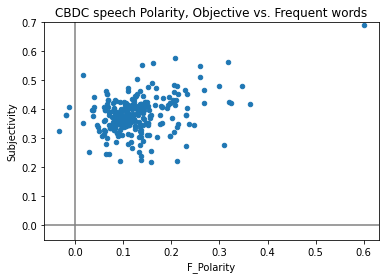

In [ ]:
df_CBDC.plot.scatter('F_Polarity','Subjectivity',ylim=[-0.05,0.7])
plt.title('CBDC speech Polarity, Objective vs. Frequent words')
plt.axvline(x=0, color='grey', label='axvline - full height')
plt.axhline(y=0, color='grey', label='axvline - full height')



> 2. Overall Polarity



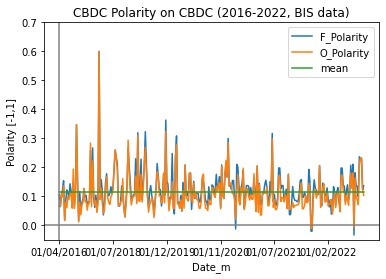

In [ ]:
#Overall Polarity
df_CBDC.plot('Date_m', y=['F_Polarity','O_Polarity','mean'],ylim=[-0.05,0.7])
plt.title('CBDC Polarity on CBDC (2016-2022, BIS data)')
plt.ylabel('Polarity [-1,1]')
plt.axvline(x=0, color='grey', label='axvline - full height')
plt.axhline(y=0, color='grey', label='axvline - full height');



> 3. Polarity of CBDC speeches strictly



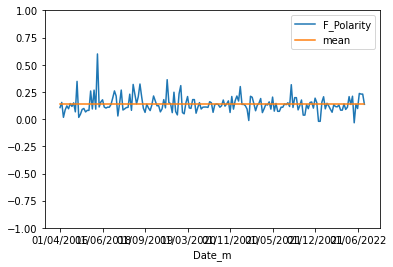

In [20]:
df_strcly_CBDC.plot(x='Date_m',y=['F_Polarity','mean'],ylim = [-1,1])

> 4. Polarity of crypto




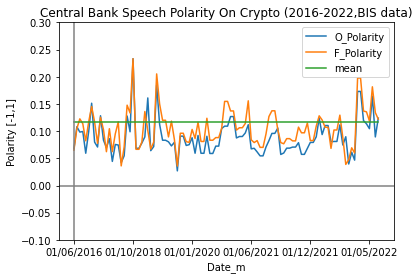

In [ ]:
df_crypto_from_CB.plot(x='Date_m',
                      y=['O_Polarity','F_Polarity','mean'],
                      ylim = [-0.1,0.3])
plt.title('Central Bank Speech Polarity On Crypto (2016-2022,BIS data)')
plt.ylabel('Polarity [-1,1]')
plt.axvline(x=0, color='grey', label='axvline - full height')
plt.axhline(y=0, color='grey', label='axvline - full height')


> 5. Fun visualization of most frequent words of each speech by plotting wordclouds



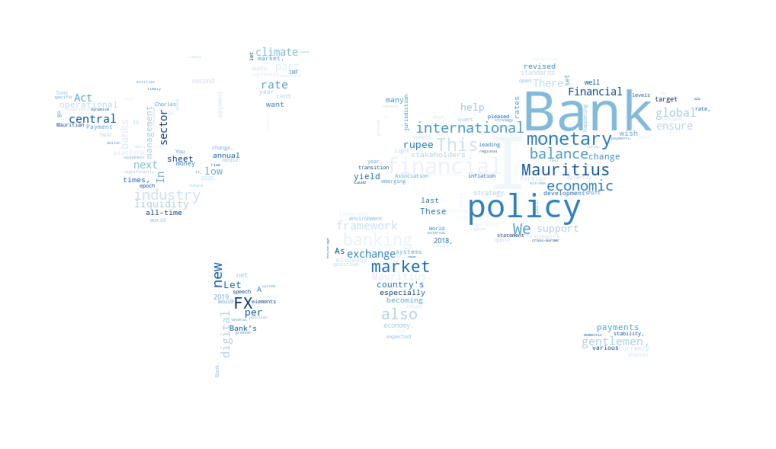

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import random 
# assume that this is the dictionary, feel free to change it
word_could_dict = [dict(i) for i in counter][100]
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/NLP CBDC/world-map-vector.png'))

wordcloud = WordCloud(background_color='white', colormap='Blues',width = 1000, height = 500,mask=mask).generate_from_frequencies(word_could_dict)

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)


> 2.1 Ploting Polarity of CBDC speeches
